# Tracking using image features

Testing the Elliptical Fourier Descriptors (EFD) similarity between instances of cells

In [1]:
import dask.array as da
import napari
import btrack
from tqdm.auto import tqdm
import skimage
from skimage.io import imshow,  imsave
import matplotlib.pyplot as plt
import numpy as np
from pyefd import elliptic_fourier_descriptors
plt.rcParams["figure.figsize"] = (15,15)

### Load images from zarr and compress into max projections

In [2]:
gfp = da.from_zarr('/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/zarr/tzxy_stack_ch1.zarr/')
rfp = da.from_zarr('/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/zarr/tzxy_stack_ch2.zarr/')
gfp = da.sum(gfp, axis = 1, dtype='u2')
rfp = da.sum(rfp, axis = 1, dtype='u2')
masks = da.from_zarr(f'/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/zarr/tzxy_stack_ch99.zarr/',)# chunks = gfp.chunks)

#### Compress into multichannel image for btrack

In [3]:
image = da.stack([gfp, rfp], axis = -1)
image

,Array,Chunk
Bytes,10.22 GiB,8.90 MiB
Shape,"(75, 6048, 6048, 2)","(1, 2160, 2160, 1)"
Count,10802 Tasks,1350 Chunks
Type,uint16,numpy.ndarray


## Define features

In [4]:
FEATURES = [
  "area",
  "major_axis_length",
  "minor_axis_length",
  "orientation",
  "solidity",
  "mean_intensity",
    "intensity_image"
]

In [5]:
objects = btrack.utils.segmentation_to_objects(
    masks, 
    image,
    properties = tuple(FEATURES),
    use_weighted_centroid = False, 
)

[INFO][2022/11/11 01:18:33 PM] Localizing objects from segmentation...
[INFO][2022/11/11 01:18:33 PM] Found intensity_image data

KeyboardInterrupt



### Or load already defined objects

In [6]:
with btrack.dataio.HDF5FileHandler(
    '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/zarr/objects.h5', 'r', obj_type='obj_type_1',
) as hdf:
    objects = hdf.objects
    masks = hdf.segmentation

[INFO][2022/11/11 01:23:05 PM] Opening HDF file: /mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/zarr/objects.h5...
[INFO][2022/11/11 01:23:05 PM] Loading objects/obj_type_1 (34804, 5) (34804 filtered: None)
[INFO][2022/11/11 01:23:17 PM] Loading segmentation (75, 6048, 6048)
[INFO][2022/11/11 01:23:17 PM] Closing HDF file: /mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/zarr/objects.h5


#### Checking featuers were measured

In [7]:
objects[0]

,ID,x,y,z,t,dummy,states,label,area,efd flat,major_axis_length,mean_intensity-0,mean_intensity-1,minor_axis_length,orientation,solidity
0,0,228.891785,53.545895,0.0,0,False,7,5,8280.0,"(400,) array",142.168182,1223.138428,337.888641,74.981392,0.768532,0.975725


## Track

Redefine features to include `efd flat` and the two different `mean_intensity` channels

In [9]:
FEATURES = ['efd flat',
                     "area",
  "major_axis_length",
  "minor_axis_length",
  "orientation",
  "solidity",
  "mean_intensity-0",
  "mean_intensity-1",
]

In [10]:
# initialise a tracker session using a context manager
with btrack.BayesianTracker() as tracker:

    # configure the tracker using a config file
    tracker.configure_from_file(
        '/home/dayn/analysis/BayesianTracker/models/particle_config.json'
    )
    tracker.verbose = True

    tracker.max_search_radius = 400
    
    # use visual features to track
    tracker.features = FEATURES
    
    # append the objects to be tracked
    tracker.append(objects)

    # set the volume
    tracker.volume=((0, 6048), (0, 6048), (-1e5, 1e5))

    # track them (in interactive mode)
    tracker.track_interactive(step_size=25)
    tracker.track(tracking_updates =['visual',], step_size=10)


    # generate hypotheses and run the global optimizer
    tracker.optimize()

#     tracker.export(f'/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/zarr/tracks.h5', obj_type='obj_type_1')

#     # get the tracks in a format for napari visualization (optional)
    visualise_tracks, properties, graph = tracker.to_napari(ndim=2)
    
    tracks = tracker.tracks

[INFO][2022/11/11 01:40:22 PM] Loaded btrack: /home/dayn/analysis/BayesianTracker/btrack/libs/libtracker.so
[INFO][2022/11/11 01:40:22 PM] btrack (v0.5.0) library imported
[INFO][2022/11/11 01:40:22 PM] Starting BayesianTracker session
[INFO][2022/11/11 01:40:22 PM] Loading configuration file: /home/dayn/analysis/BayesianTracker/models/particle_config.json
[INFO][2022/11/11 01:40:22 PM] Setting max_search_radius -> 400
[INFO][2022/11/11 01:40:22 PM] Setting features -> ['efd flat', 'area', 'major_axis_length', 'minor_axis_length', 'orientation', 'solidity', 'mean_intensity-0', 'mean_intensity-1']
[INFO][2022/11/11 01:40:22 PM] Objects are of type: <class 'list'>
[INFO][2022/11/11 01:40:23 PM] Setting volume -> ((0, 6048), (0, 6048), (-100000.0, 100000.0))
[WARNING][2022/11/11 01:40:23 PM] `track_interactive` will be deprecated. Use `track` instead.
[INFO][2022/11/11 01:40:23 PM] Starting tracking... 
[INFO][2022/11/11 01:40:23 PM] Update using: ['MOTION']
[INFO][2022/11/11 01:40:23 PM]

GLPK Integer Optimizer 5.0
70416 rows, 58526 columns, 81844 non-zeros
58526 integer variables, all of which are binary
Preprocessing...
35208 rows, 58526 columns, 81844 non-zeros
58526 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 35208
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
35208 rows, 58526 columns, 81844 non-zeros
*     0: obj =   2.183635026e+05 inf =   0.000e+00 (19173)
Perturbing LP to avoid stalling [2020]...
*  5423: obj =   1.615217090e+05 inf =   0.000e+00 (13597)
* 10163: obj =   1.172396289e+05 inf =   0.000e+00 (8799)
* 13294: obj =   1.059360742e+05 inf =   0.000e+00 (5648) 1
* 17169: obj =   9.161169685e+04 inf =   0.000e+00 (2105) 1
Removing LP perturbation [19481]...
* 19481: obj =   8.868552814e+04 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
Long-step 

[INFO][2022/11/11 01:41:35 PM] Ending BayesianTracker session


In [14]:
tracks[100]

,ID,t,x,y,z,parent,root,state,generation,dummy,efd flat,orientation,mean_intensity-1,solidity,major_axis_length,mean_intensity-0,minor_axis_length,area
0,101,0,1845.50892,3749.178702,0.0,101,101,5,0,False,"(1, 400) array","(1,) array","(1,) array","(1,) array","(1,) array","(1,) array","(1,) array","(1,) array"


In [15]:
print(tracks[0].properties['area'])

[21286.    nan 25428.]


In [ ]:
print(tracks[0].properties['area'])

(array([3.5618e+04, 4.8470e+03, 1.0600e+03, 1.0500e+02, 5.0000e+01,
        1.3000e+01, 3.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1. ,  5.5, 10. , 14.5, 19. , 23.5, 28. , 32.5, 37. , 41.5, 46. ]),
 <BarContainer object of 10 artists>)

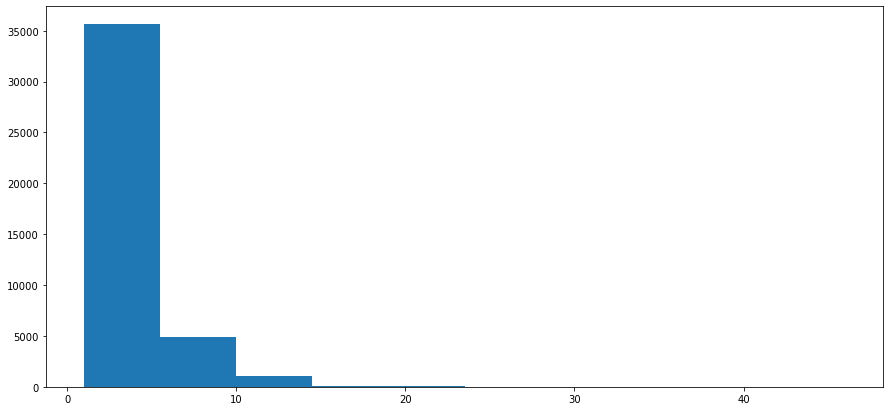

In [16]:
plt.hist([len(track) for track in tracks])

In [11]:
len([len(track) for track in tracks if len(track) > 50])

5

In [ ]:
plt.hist([len(track) for track in tracks if len(track) > 7])

### Filter tracks

In [14]:
tracks_filt = [track for track in tracks if len(track) > 15]
visualise_tracks, properties, graph = btrack.utils.tracks_to_napari(tracks_filt, ndim = 2)

In [15]:
visualise_raw_tracks, properties, graph = btrack.utils.tracks_to_napari(tracks, ndim = 2)

In [16]:
viewer = napari.Viewer()
viewer.add_image(gfp, name="gfp", 
                 #contrast_limits=[0,255],
                 blending = 'additive', colormap = 'green')
viewer.add_image(rfp, name="rfp", 
                # contrast_limits=[0,55], 
                 blending = 'additive', colormap = 'magenta')
viewer.add_labels(masks, name = 'masks')
viewer.add_tracks(visualise_tracks, name = 'tracks_filtered')
viewer.add_tracks(visualise_raw_tracks, name = 'tracks')


Assistant skips harvesting pyclesperanto as it's not installed.


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Tracks layer 'tracks' at 0x7f1e9d25ed30>

In [17]:
track = [track for track in tracks if track.ID == 4356][0]

In [18]:
track

,ID,t,x,y,z,parent,root,state,generation,dummy,major_axis_length,solidity,orientation,mean_intensity-1,minor_axis_length,area,mean_intensity-0,efd flat
0,4356,11,3604.493164,55.928387,0.0,4356,4356,5,0,False,338.573822,0.976821,-1.390276,352.449432,118.369217,30511.0,1199.229980,"(400,) array"
1,4356,12,3604.493164,55.928387,0.0,4356,4356,5,0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(400,) array"
2,4356,13,3604.493164,55.928387,0.0,4356,4356,5,0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(400,) array"
3,4356,14,3613.025146,44.735695,0.0,4356,4356,5,0,False,255.922958,0.990157,-1.451002,352.707733,100.219276,19818.0,1231.977905,"(400,) array"
4,4356,15,3621.090088,49.873013,0.0,4356,4356,5,0,False,217.880096,0.988944,-1.425330,354.447937,111.276276,18695.0,1374.042114,"(400,) array"
5,4356,16,3636.561523,44.243336,0.0,4356,4356,5,0,False,205.540253,0.987196,-1.385110,351.877594,97.752754,15497.0,1135.383667,"(400,) array"
6,4356,18,3608.913818,51.314865,0.0,4356,4356,5,0,False,260.523041,0.988631,-1.357507,355.052063,106.518166,21479.0,1464.241821,"(400,) array"
7,4356,19,3608.913818,51.314865,0.0,4356,4356,5,0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(400,) array"
8,4356,20,3608.913818,51.314865,0.0,4356,4356,5,0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(400,) array"
9,4356,21,3623.364014,49.225121,0.0,4356,4356,5,0,False,200.906509,0.987061,-1.268050,356.598450,95.528374,14952.0,1885.669189,"(400,) array"
